In [97]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from pprint import pprint
import urllib
from random import uniform

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [98]:

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
pprint(cities)

632
['ponta do sol',
 'norman wells',
 'alotau',
 'guerrero negro',
 'muravlenko',
 'barrow',
 'ushuaia',
 'husavik',
 'anadyr',
 'saleaula',
 'port lincoln',
 'vaini',
 'grand gaube',
 'hermanus',
 'saskylakh',
 'san patricio',
 'longyearbyen',
 'hilo',
 'albany',
 'malatya',
 'mataura',
 'constantine',
 'avarua',
 'sorvag',
 'mar del plata',
 'butaritari',
 'nikolskoye',
 'busselton',
 'saint-philippe',
 'dalvik',
 'arraial do cabo',
 'wanlaweyn',
 'san policarpo',
 'hamilton',
 'adrar',
 'severo-kurilsk',
 'tezu',
 'taolanaro',
 'bowen',
 'kahului',
 'san jose',
 'jamestown',
 'punta arenas',
 'dingle',
 'nouadhibou',
 'beringovskiy',
 'yellowknife',
 'haines junction',
 'rikitea',
 'troitsko-pechorsk',
 'jibuti',
 'cherskiy',
 'aksu',
 'cape town',
 'new norfolk',
 'murmashi',
 'chastyye',
 'waipawa',
 'saint george',
 'chokurdakh',
 'aykhal',
 'barentsburg',
 'east london',
 'kenai',
 'atyrau',
 'tessalit',
 'talnakh',
 'samusu',
 'port alfred',
 'camacha',
 'cabo san lucas',
 'bl

In [99]:
# Make a df to add data from API and drop any duplicates
cities_df = pd.DataFrame({'City': cities})
cities_df['Country']=""
cities_df['Date']=""
cities_df['Temperature (F)']=""
cities_df['Humidity (%)']=""
cities_df['Cloudiness (%)']=""
cities_df['Wind Speed (mph)']=""
cities_df['Latitude']=""
cities_df['Longitude']=""
cities_df

,City,Country,Date,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Latitude,Longitude
0,ponta do sol,,,,,,,,
1,norman wells,,,,,,,,
2,alotau,,,,,,,,
3,guerrero negro,,,,,,,,
4,muravlenko,,,,,,,,
5,barrow,,,,,,,,
6,ushuaia,,,,,,,,
7,husavik,,,,,,,,
8,anadyr,,,,,,,,
9,saleaula,,,,,,,,


## Perform API Calls

In [100]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

#url = "http://api.openweathermap.org/data/2.5/weather?"

# Loop through cities using a count and add data to df 

count_row = 1
count_set = 1

print("Let The Data Retrieval Begin!")

for index, city in enumerate(cities):    
    if (index % 50 == 0 and index >= 50):
        count_set += 1
        count_row = 0
        
        
    #urllib.request.pathname2url(path)Convert the pathname path from the local syntax for a path to the form used in the path component of a URL. 
    city_url = url + "&q=" + urllib.request.pathname2url(city)
    
    print("Processing: Record %s of Set %s | %s" % (count_row, count_set, city))
    print(city_url)
    
    count_row += 1
    
    try:
        city_response = requests.get(city_url).json() 
    
        
        cities_df.set_value(index, 'Country', city_response["sys"]["country"])
        cities_df.set_value(index, 'Date', city_response["dt"])
        cities_df.set_value(index, 'Temperature (F)', city_response["main"]["temp"])
        cities_df.set_value(index, 'Humidity (%)', city_response["main"]["humidity"])
        cities_df.set_value(index, 'Cloudiness (%)', city_response["clouds"]["all"])
        cities_df.set_value(index, 'Wind Speed (mph)', city_response["wind"]["speed"])
        cities_df.set_value(index, 'Latitude', city_response["coord"]["lat"])
        cities_df.set_value(index, 'Longitude', city_response["coord"]["lon"])
        
    except:
        print("Must Be a Black Hole... City not found.")
        pass
    
print("-----------------------------")
print("Data Retrieval Complete      ")
    

    

Let The Data Retrieval Begin!
Processing: Record 1 of Set 1 | ponta do sol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=ponta%20do%20sol
Processing: Record 2 of Set 1 | norman wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=norman%20wells


/Users/Ali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/Ali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/Ali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/Ali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/Ali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


Processing: Record 3 of Set 1 | alotau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=alotau
Must Be a Black Hole... City not found.
Processing: Record 4 of Set 1 | guerrero negro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=guerrero%20negro
Processing: Record 5 of Set 1 | muravlenko
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=muravlenko
Processing: Record 6 of Set 1 | barrow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=barrow
Processing: Record 7 of Set 1 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=ushuaia
Processing: Record 8 of Set 1 | husavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=husavik
Processing: Record 9 of Set 1 | anad

Processing: Record 4 of Set 2 | new norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=new%20norfolk
Processing: Record 5 of Set 2 | murmashi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=murmashi
Processing: Record 6 of Set 2 | chastyye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=chastyye
Processing: Record 7 of Set 2 | waipawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=waipawa
Processing: Record 8 of Set 2 | saint george
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=saint%20george
Processing: Record 9 of Set 2 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=chokurdakh
Processing: Record 10 of Set 2 | aykhal
http://api.openweather

Processing: Record 7 of Set 3 | makakilo city
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=makakilo%20city
Processing: Record 8 of Set 3 | illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=illoqqortoormiut
Must Be a Black Hole... City not found.
Processing: Record 9 of Set 3 | goderich
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=goderich
Processing: Record 10 of Set 3 | santa isabel do rio negro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=santa%20isabel%20do%20rio%20negro
Processing: Record 11 of Set 3 | amderma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=amderma
Must Be a Black Hole... City not found.
Processing: Record 12 of Set 3 | nizhneyansk
http://api.openweathermap.org/data/2.5/w

Processing: Record 9 of Set 4 | zhuhai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=zhuhai
Processing: Record 10 of Set 4 | trapani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=trapani
Processing: Record 11 of Set 4 | esperance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=esperance
Processing: Record 12 of Set 4 | boshnyakovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=boshnyakovo
Processing: Record 13 of Set 4 | dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=dikson
Processing: Record 14 of Set 4 | morros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=morros
Processing: Record 15 of Set 4 | gilgil
http://api.openweathermap.org/data/2.5/weat

Processing: Record 11 of Set 5 | kavieng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=kavieng
Processing: Record 12 of Set 5 | tiarei
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=tiarei
Processing: Record 13 of Set 5 | zaysan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=zaysan
Processing: Record 14 of Set 5 | egvekinot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=egvekinot
Processing: Record 15 of Set 5 | miri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=miri
Processing: Record 16 of Set 5 | homer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=homer
Processing: Record 17 of Set 5 | lavrentiya
http://api.openweathermap.org/data/2.5/weather?units=I

Processing: Record 16 of Set 6 | half moon bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=half%20moon%20bay
Processing: Record 17 of Set 6 | christchurch
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=christchurch
Processing: Record 18 of Set 6 | tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=tasiilaq
Processing: Record 19 of Set 6 | hualmay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=hualmay
Processing: Record 20 of Set 6 | tumannyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=tumannyy
Must Be a Black Hole... City not found.
Processing: Record 21 of Set 6 | fortuna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=fortuna
Processing: Record

Processing: Record 19 of Set 7 | pudozh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=pudozh
Processing: Record 20 of Set 7 | smolenka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=smolenka
Processing: Record 21 of Set 7 | makasar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=makasar
Processing: Record 22 of Set 7 | sterling
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=sterling
Processing: Record 23 of Set 7 | lisakovsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=lisakovsk
Processing: Record 24 of Set 7 | falealupo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=falealupo
Must Be a Black Hole... City not found.
Processing: Record 25 of Set 7 | quatr

Processing: Record 22 of Set 8 | viligili
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=viligili
Must Be a Black Hole... City not found.
Processing: Record 23 of Set 8 | chagda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=chagda
Must Be a Black Hole... City not found.
Processing: Record 24 of Set 8 | batagay-alyta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=batagay-alyta
Processing: Record 25 of Set 8 | afmadu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=afmadu
Must Be a Black Hole... City not found.
Processing: Record 26 of Set 8 | sitka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=sitka
Processing: Record 27 of Set 8 | sioux lookout
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID

Processing: Record 23 of Set 9 | valdivia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=valdivia
Processing: Record 24 of Set 9 | vermilion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=vermilion
Processing: Record 25 of Set 9 | zheleznodorozhnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=zheleznodorozhnyy
Processing: Record 26 of Set 9 | mango
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=mango
Processing: Record 27 of Set 9 | rizomata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=rizomata
Processing: Record 28 of Set 9 | galle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=galle
Processing: Record 29 of Set 9 | shubarkuduk
http://api.openweatherm

Processing: Record 25 of Set 10 | alofi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=alofi
Processing: Record 26 of Set 10 | fort-shevchenko
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=fort-shevchenko
Processing: Record 27 of Set 10 | lima
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=lima
Processing: Record 28 of Set 10 | fairbanks
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=fairbanks
Processing: Record 29 of Set 10 | esil
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=esil
Processing: Record 30 of Set 10 | legnica
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=legnica
Processing: Record 31 of Set 10 | dalinghe
http://api.openweathermap.org/data/

Processing: Record 27 of Set 11 | kostomuksha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=kostomuksha
Processing: Record 28 of Set 11 | sur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=sur
Processing: Record 29 of Set 11 | marki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=marki
Processing: Record 30 of Set 11 | wentzville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=wentzville
Processing: Record 31 of Set 11 | katsiveli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=katsiveli
Must Be a Black Hole... City not found.
Processing: Record 32 of Set 11 | alta floresta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=alta%20floresta
Processing: Record 33 

Processing: Record 30 of Set 12 | nikolayevsk-na-amure
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=nikolayevsk-na-amure
Processing: Record 31 of Set 12 | sefton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=sefton
Processing: Record 32 of Set 12 | marcona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=marcona
Must Be a Black Hole... City not found.
Processing: Record 33 of Set 12 | lewistown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=lewistown
Processing: Record 34 of Set 12 | meadow lake
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=meadow%20lake
Processing: Record 35 of Set 12 | mitsamiouli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=mitsamio

Processing: Record 30 of Set 13 | bubaque
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=bubaque
Processing: Record 31 of Set 13 | sakakah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=sakakah
Must Be a Black Hole... City not found.
-----------------------------
Data Retrieval Complete      


In [101]:
cities_df.count()

City                632
Country             632
Date                632
Temperature (F)     632
Humidity (%)        632
Cloudiness (%)      632
Wind Speed (mph)    632
Latitude            632
Longitude           632
dtype: int64

In [102]:
cities_df.head(5)

,City,Country,Date,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Latitude,Longitude
0,ponta do sol,BR,1533895947,59.22,91,32,4.94,-20.63,-46
1,norman wells,CA,1533891600,44.6,100,90,11.41,65.28,-126.83
2,alotau,,,,,,,,
3,guerrero negro,MX,1533896058,74.61,94,0,2.59,27.97,-114.04
4,muravlenko,RU,1533896190,60.03,88,12,4.5,63.79,74.5


In [103]:
cities_df.to_csv(output_data_file, index_label = "cities.csv")

In [113]:
city2 = ["City"]
lats = cities_df["Latitude"]
max_temps = cities_df["Temperature (F)"]
humidity = cities_df["Humidity (%)"]
cloudiness = cities_df["Cloudiness (%)"]
wind_speed = cities_df["Wind Speed (mph)"]

ValueError: c of shape (632,) not acceptable as a color sequence for x with size 632, y with size 632

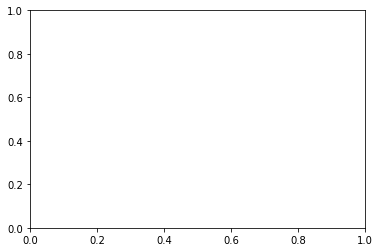

In [116]:
plt.scatter(lats,
            max_temps, c=max_temps ,
            edgecolor="black", linewidths=1, marker="o",
            cmap='cool', alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

ValueError: could not convert string to float: 

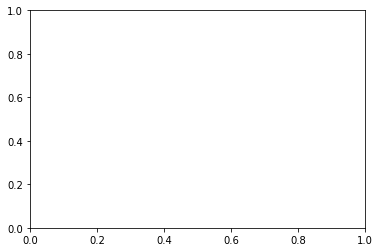

In [118]:
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label=cities)



In [ ]:

plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
